# Animal Classification

This is capstone-1 project ML-ZoomCamp 2023.

Dataset: https://www.kaggle.com/datasets/alessiocorrado99/animals10

Objective:
- Recognize animals in pictures
- Use transfer learning using CNN Xception

## Imports Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import os
import random
import shutil

import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

2023-12-20 12:17:24.558394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 12:17:25.231234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-20 12:17:25.231299: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-12-20 12:17:25.231305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
print('tf_version:', tf.__version__)
print('device_type:', tf.config.list_physical_devices('GPU'))

tf_version: 2.11.1
device_type: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-20 08:02:56.710593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 08:02:56.746194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 08:02:56.746546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
# set seed
tf.random.set_seed(42)

In [4]:
print(f"Num GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Num GPUs Available: 1


## Downloading and exploring data

In [5]:
!mkdir ./data

mkdir: cannot create directory ‘./data’: File exists


- Download dataset from https://www.kaggle.com/datasets/alessiocorrado99/animals10
- Unzip at /data

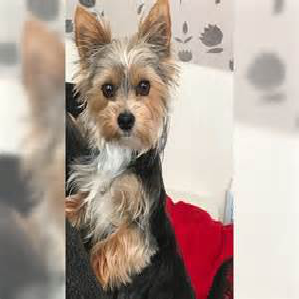

In [6]:
data_path = './data/archive/raw-img'
img_sample = load_img(os.path.join(data_path, 'cane', 'OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'), target_size=(299, 299))
img_sample

## EDA

In [7]:
categories = os.listdir(data_path)
print(f"Number of item categories: {len(categories)}")
print(f"categories: {categories}")

Number of item categories: 10
categories: ['pecora', 'farfalla', 'mucca', 'elefante', 'ragno', 'gatto', 'cane', 'gallina', 'scoiattolo', 'cavallo']


In [8]:
# number of images in each category
for cls in categories:
    print(cls, ':', len(os.listdir(os.path.join(data_path, cls))))

pecora : 1820
farfalla : 2112
mucca : 1866
elefante : 1446
ragno : 4821
gatto : 1668
cane : 4863
gallina : 3098
scoiattolo : 1862
cavallo : 2623


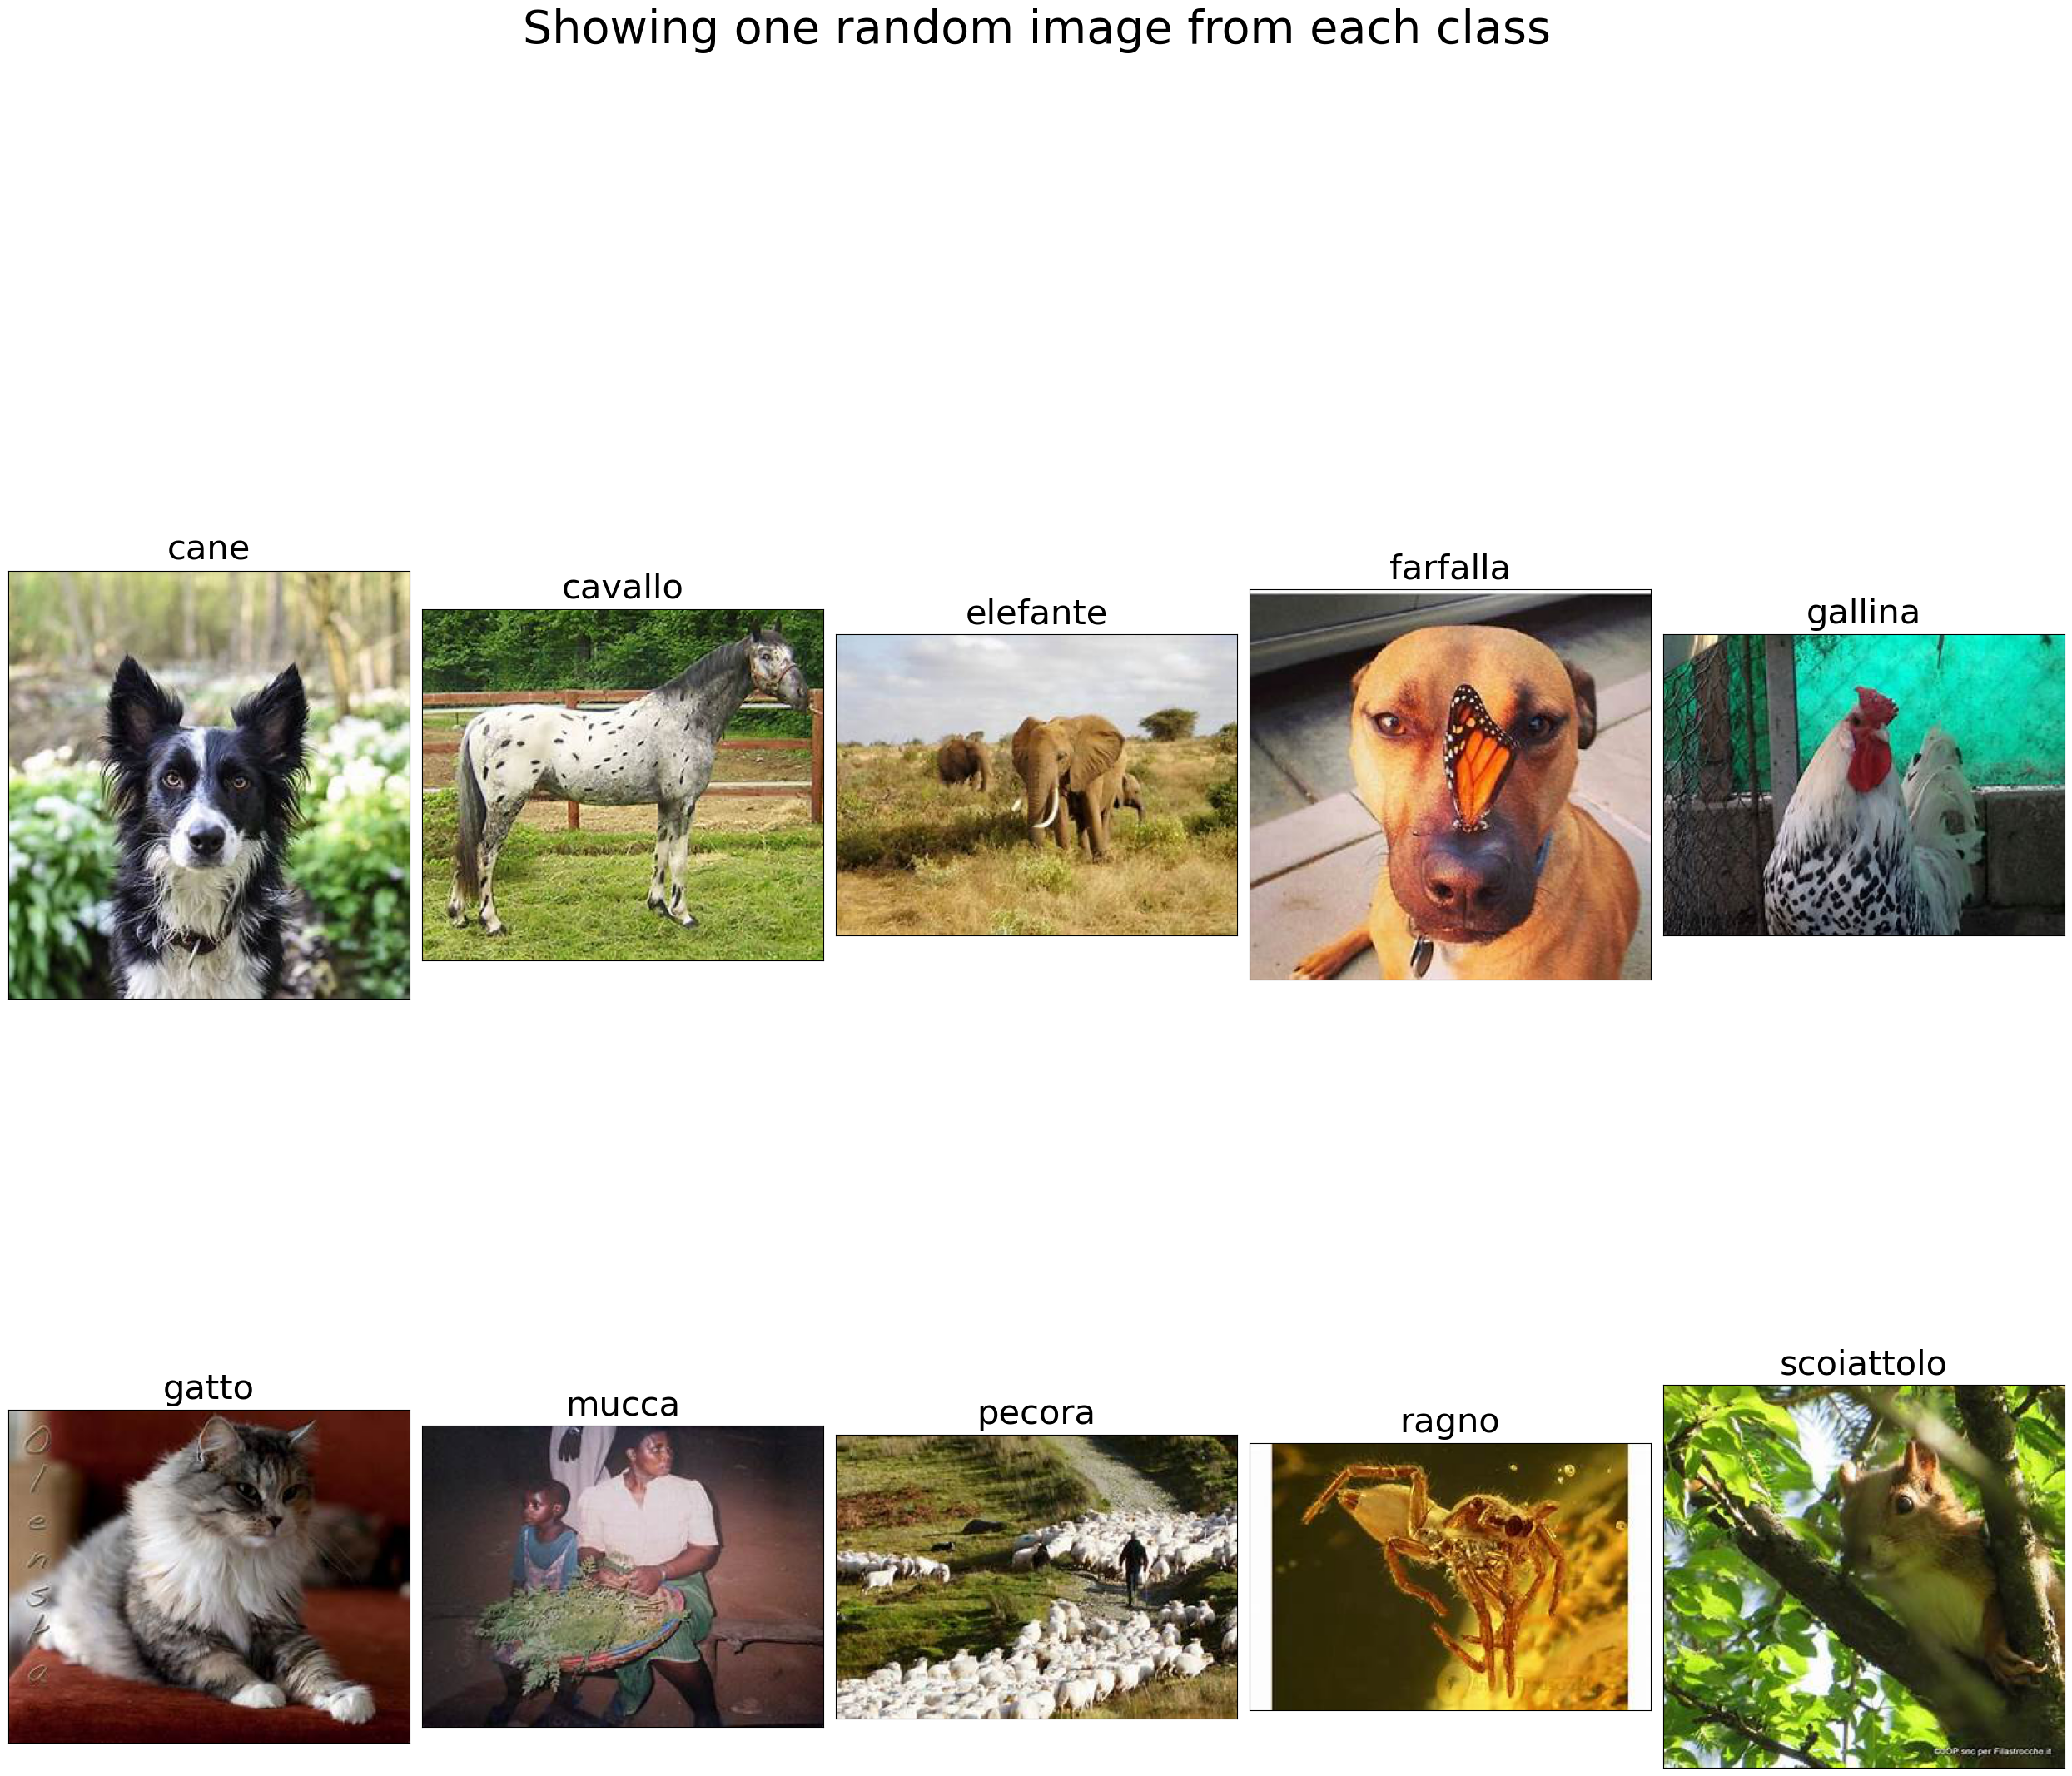

In [9]:
# Visualize the data, showing one image per class from 101 classes
rows = 2
cols = 5
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=40)
animals_sorted = sorted(os.listdir(data_path))
animal_id = 0
for i in range(rows):
  for j in range(cols):
    animal_categ = animals_sorted[animal_id] 
    animal_id += 1
    if animal_categ is None or animal_categ[0] == '.':
        continue
    animal_selected_images = os.listdir(os.path.join(data_path,animal_categ))
    animal_selected_random = np.random.choice(animal_selected_images)
    img = plt.imread(os.path.join(data_path,animal_categ, animal_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animal_categ, pad = 10, fontsize=30)
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

## Pre-trained convolutional neural networks
- Imagenet dataset: https://www.image-net.org
- Pre-trained models: https://keras.io/api/applications

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2023-12-20 08:03:03.716802: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 08:03:03.717910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 08:03:03.718293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 08:03:03.718590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

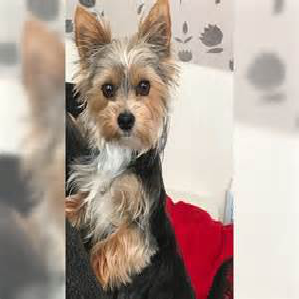

In [11]:
img_sample

In [12]:
x = np.array(img_sample)
print(x.shape)
X = np.array([x])
print(X.shape)
X = preprocess_input(X)
pred = model.predict(X)
print(pred.shape)
decode_predictions(pred)

(299, 299, 3)
(1, 299, 299, 3)


2023-12-20 08:03:07.273243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


1/1 [==============================] - 4s 4s/step
(1, 1000)


2023-12-20 08:03:09.510640: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.89GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:03:09.510675: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.89GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:03:09.581485: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.07GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:03:09.581510: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

[[('n02094433', 'Yorkshire_terrier', 0.63485783),
  ('n02096294', 'Australian_terrier', 0.04705791),
  ('n02097658', 'silky_terrier', 0.042579174),
  ('n02087046', 'toy_terrier', 0.008181706),
  ('n02094258', 'Norwich_terrier', 0.0041037924)]]

## Creating train-test datasets

In [13]:
train_path = './data/archive/train'
train_path

'./data/archive/train'

In [14]:
test_path = './data/archive/test'
test_path

'./data/archive/test'

In [15]:
def setup_dirs():
    !rm -r {train_path}
    !rm -r {test_path}
    print("creating dir:", train_path)
    !mkdir {train_path}
    print("creating dir:", test_path)
    !mkdir {test_path}

In [16]:
def prepare_data(data_path, train_path, test_path, categories, ratio=0.2):
    print(data_path, train_path, test_path, categories, ratio)
    for category in categories:
        print(f"processing category: {category}")
        
        categ_train_path = os.path.join(train_path, category) 
        os.mkdir(categ_train_path)
        categ_test_path = os.path.join(test_path, category)
        os.mkdir(categ_test_path)
        
        samples = os.listdir(os.path.join(data_path, category))
        random.shuffle(samples)
        total_samples = len(samples)
        print(f"Number of samples: {total_samples}")
        cutoff = int(ratio*total_samples)
        
        test_samples = samples[0:cutoff]
        train_samples = samples[cutoff:]
        
        for file in test_samples:
            shutil.copy(os.path.join(data_path, category, file), categ_test_path)
        
        for file in train_samples:
            shutil.copy(os.path.join(data_path, category, file), categ_train_path)

In [17]:
setup_dirs()
prepare_data(data_path, train_path, test_path, categories)

creating dir: ./data/archive/train
creating dir: ./data/archive/test
./data/archive/raw-img ./data/archive/train ./data/archive/test ['pecora', 'farfalla', 'mucca', 'elefante', 'ragno', 'gatto', 'cane', 'gallina', 'scoiattolo', 'cavallo'] 0.2
processing category: pecora
Number of samples: 1820
processing category: farfalla
Number of samples: 2112
processing category: mucca
Number of samples: 1866
processing category: elefante
Number of samples: 1446
processing category: ragno
Number of samples: 4821
processing category: gatto
Number of samples: 1668
processing category: cane
Number of samples: 4863
processing category: gallina
Number of samples: 3098
processing category: scoiattolo
Number of samples: 1862
processing category: cavallo
Number of samples: 2623


## Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/
## Transfer learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32
)

Found 20947 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [20]:
X, y = next(train_ds)
print(X.shape)
print(y[:3])

(32, 150, 150, 3)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 5232 images belonging to 10 classes.


In [22]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [23]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10


2023-12-20 08:04:27.146391: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:04:27.146413: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:04:27.186533: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1e959570 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-20 08:04:27.186554: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2023-12-20 08:04:27.207595: I tensorflow/compiler/

  2/655 [..............................] - ETA: 38s - loss: 2.6141 - accuracy: 0.0625  

2023-12-20 08:04:27.452248: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


381/655 [================>.............] - ETA: 15s - loss: 0.9968 - accuracy: 0.7283

2023-12-20 08:04:48.342385: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-20 08:04:48.342418: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


655/655 [==============================] - 51s 73ms/step - loss: 0.7569 - accuracy: 0.7979 - val_loss: 0.3741 - val_accuracy: 0.9000
Epoch 2/10
655/655 [==============================] - 47s 72ms/step - loss: 0.3140 - accuracy: 0.9134 - val_loss: 0.2958 - val_accuracy: 0.9121
Epoch 3/10
655/655 [==============================] - 46s 70ms/step - loss: 0.2601 - accuracy: 0.9219 - val_loss: 0.2659 - val_accuracy: 0.9165
Epoch 4/10
655/655 [==============================] - 46s 70ms/step - loss: 0.2336 - accuracy: 0.9280 - val_loss: 0.2504 - val_accuracy: 0.9230
Epoch 5/10
655/655 [==============================] - 52s 79ms/step - loss: 0.2159 - accuracy: 0.9335 - val_loss: 0.2419 - val_accuracy: 0.9258
Epoch 6/10
655/655 [==============================] - 51s 78ms/step - loss: 0.2024 - accuracy: 0.9369 - val_loss: 0.2359 - val_accuracy: 0.9253
Epoch 7/10
655/655 [==============================] - 50s 77ms/step - loss: 0.1913 - accuracy: 0.9408 - val_loss: 0.2301 - val_accuracy: 0.9279
Epo

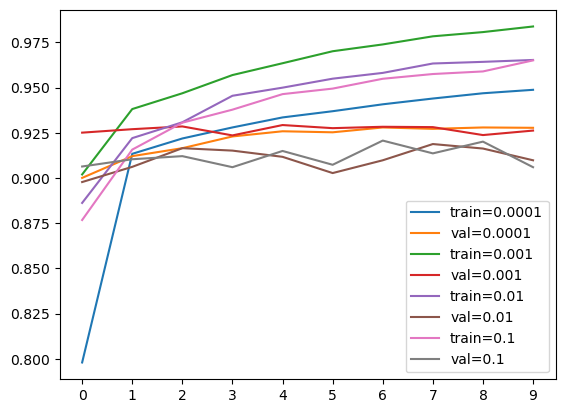

In [24]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## Checkpointing
- Saving the best model only
- Training a model with callbacks

In [25]:
model.save_weights('model_v1.h5', save_format='h5')

In [27]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [28]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
655/655 [==============================] - 50s 74ms/step - loss: 0.3251 - accuracy: 0.9002 - val_loss: 0.2393 - val_accuracy: 0.9279
Epoch 2/10
655/655 [==============================] - 48s 74ms/step - loss: 0.1962 - accuracy: 0.9363 - val_loss: 0.2432 - val_accuracy: 0.9237
Epoch 3/10
655/655 [==============================] - 51s 78ms/step - loss: 0.1574 - accuracy: 0.9484 - val_loss: 0.2381 - val_accuracy: 0.9262
Epoch 4/10
655/655 [==============================] - 56s 85ms/step - loss: 0.1318 - accuracy: 0.9573 - val_loss: 0.2422 - val_accuracy: 0.9287
Epoch 5/10
655/655 [==============================] - 61s 93ms/step - loss: 0.1125 - accuracy: 0.9647 - val_loss: 0.2561 - val_accuracy: 0.9260
Epoch 6/10
655/655 [==============================] - 49s 74ms/step - loss: 0.0973 - accuracy: 0.9701 - val_loss: 0.2541 - val_accuracy: 0.9281
Epoch 7/10
655/655 [==============================] - 48s 74ms/step - loss: 0.0843 - accuracy: 0.9738 - val_loss: 0.2654 - val_accuracy:

## Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [29]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [30]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
655/655 [==============================] - 49s 71ms/step - loss: 0.5096 - accuracy: 0.8559 - val_loss: 0.2849 - val_accuracy: 0.9142
Epoch 2/10
655/655 [==============================] - 46s 70ms/step - loss: 0.2335 - accuracy: 0.9304 - val_loss: 0.2584 - val_accuracy: 0.9211
Epoch 3/10
655/655 [==============================] - 46s 71ms/step - loss: 0.1921 - accuracy: 0.9409 - val_loss: 0.2546 - val_accuracy: 0.9228
Epoch 4/10
655/655 [==============================] - 47s 71ms/step - loss: 0.1632 - accuracy: 0.9478 - val_loss: 0.2488 - val_accuracy: 0.9241
Epoch 5/10
655/655 [==============================] - 47s 72ms/step - loss: 0.1428 - accuracy: 0.9546 - val_loss: 0.2489 - val_accuracy: 0.9268
Epoch 6/10
655/655 [==============================] - 48s 73ms/step - loss: 0.1242 - accuracy: 0.9624 - val_loss: 0.2596 - val_accuracy: 0.9249
Epoch 7/10
655/655 [==============================] - 48s 73ms/step - loss: 0.1103 - accuracy: 0.9663 - val_loss: 0.2744 - val_accura

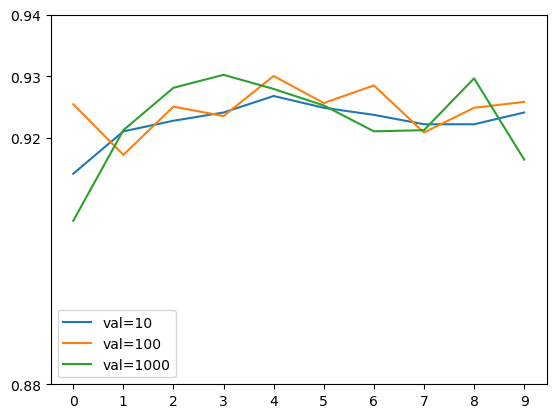

In [39]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.88, 0.92, 0.93, 0.94])
plt.legend()

## Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [40]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=15, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/15
655/655 [==============================] - 51s 74ms/step - loss: 0.3140 - accuracy: 0.9044 - val_loss: 0.2399 - val_accuracy: 0.9274
Epoch 2/15
655/655 [==============================] - 48s 73ms/step - loss: 0.1864 - accuracy: 0.9389 - val_loss: 0.2275 - val_accuracy: 0.9306
Epoch 3/15
655/655 [==============================] - 47s 72ms/step - loss: 0.1377 - accuracy: 0.9553 - val_loss: 0.2362 - val_accuracy: 0.9285
Epoch 4/15
655/655 [==============================] - 48s 72ms/step - loss: 0.1058 - accuracy: 0.9647 - val_loss: 0.2599 - val_accuracy: 0.9272
Epoch 5/15
655/655 [==============================] - 47s 72ms/step - loss: 0.0773 - accuracy: 0.9737 - val_loss: 0.2660 - val_accuracy: 0.9274
Epoch 6/15
655/655 [==============================] - 47s 72ms/step - loss: 0.0601 - accuracy: 0.9805 - val_loss: 0.3056 - val_accuracy: 0.9264
Epoch 7/15
655/655 [==============================] - 47s 72ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.3344 - val_accur

655/655 [==============================] - 47s 72ms/step - loss: 0.3870 - accuracy: 0.8626 - val_loss: 0.2461 - val_accuracy: 0.9272
Epoch 13/15
655/655 [==============================] - 49s 75ms/step - loss: 0.3843 - accuracy: 0.8640 - val_loss: 0.2457 - val_accuracy: 0.9264
Epoch 14/15
655/655 [==============================] - 57s 87ms/step - loss: 0.3829 - accuracy: 0.8634 - val_loss: 0.2388 - val_accuracy: 0.9283
Epoch 15/15
655/655 [==============================] - 54s 83ms/step - loss: 0.3701 - accuracy: 0.8651 - val_loss: 0.2523 - val_accuracy: 0.9293




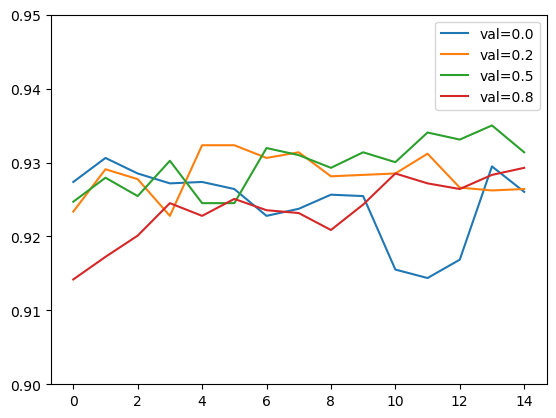

In [57]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.90, 0.95)
plt.legend()

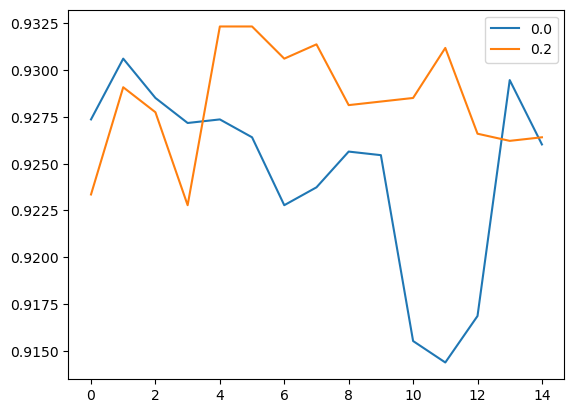

In [54]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation
- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [45]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


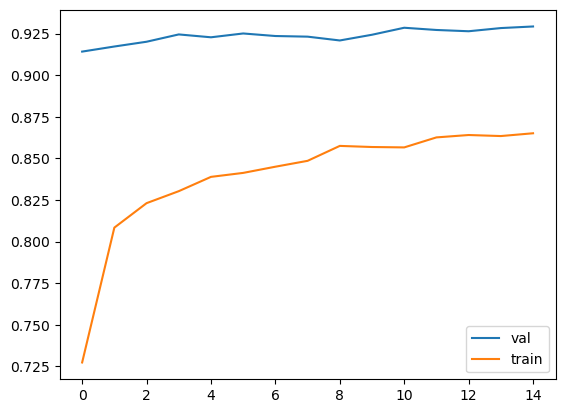

In [46]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Training a larger model
- Train a 299x299 model

In [47]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
input_size = 299

In [49]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    train_path,
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    test_path,
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [50]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [51]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/10
655/655 [==============================] - 361s 546ms/step - loss: 0.1936 - accuracy: 0.9528 - val_loss: 0.0877 - val_accuracy: 0.9759
Epoch 2/10
655/655 [==============================] - 425s 648ms/step - loss: 0.0856 - accuracy: 0.9764 - val_loss: 0.0756 - val_accuracy: 0.9757
Epoch 3/10
655/655 [==============================] - 393s 599ms/step - loss: 0.0711 - accuracy: 0.9801 - val_loss: 0.0613 - val_accuracy: 0.9832
Epoch 4/10
655/655 [==============================] - 340s 519ms/step - loss: 0.0605 - accuracy: 0.9819 - val_loss: 0.0595 - val_accuracy: 0.9826
Epoch 5/10
655/655 [==============================] - 339s 517ms/step - loss: 0.0531 - accuracy: 0.9853 - val_loss: 0.0642 - val_accuracy: 0.9809
Epoch 6/10
655/655 [==============================] - 336s 513ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0581 - val_accuracy: 0.9826
Epoch 7/10
655/655 [==============================] - 335s 511ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.0579 -

## Loading h5 model

In [2]:
model_name = 'xception_v4_1_10_0.985.h5'
model = keras.models.load_model(model_name)

2023-12-20 12:17:34.384336: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 12:17:34.413194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 12:17:34.413613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-20 12:17:34.414516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [ ]:
img_path = './data/archive/raw-img/cane/OIP-0B2H2VPu9neVWW7TtvJlPAAAAA.jpeg'
img = load_img(img_path, target_size=(299, 299))
img

In [60]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [61]:
preds = model.predict(X)

1/1 [==============================] - 1s 739ms/step


In [62]:
train_ds.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [63]:
classes = [
    'cane',
    'cavallo',
    'elefante',
    'farfalla',
    'gallina',
    'gatto',
    'mucca',
    'pecora',
    'ragno',
    'scoiattolo'
]

In [64]:
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "ragno": "spider",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "dog": "cane",
    "cavallo": "horse",
    "elephant" : "elefante",
    "butterfly": "farfalla",
    "chicken": "gallina",
    "cat": "gatto",
    "cow": "mucca",
    "spider": "ragno",
    "squirrel": "scoiattolo"
}

In [65]:
categories = [translate[c] for c in classes]
categories

['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'spider',
 'squirrel']

In [66]:
dict(zip(categories, preds[0]))

{'dog': 9.325999,
 'horse': -6.9722424,
 'elephant': -1.9243337,
 'butterfly': -0.9303365,
 'chicken': -2.6573105,
 'cat': -1.720826,
 'cow': 0.8949288,
 'sheep': -0.41606888,
 'spider': -4.917477,
 'squirrel': -3.1553016}

## Convert Keras to TF-Lite

In [67]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('animal-model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbg7ka28_/assets


INFO:tensorflow:Assets written to: /tmp/tmpbg7ka28_/assets
2023-12-20 12:15:34.591331: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-12-20 12:15:34.591360: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-12-20 12:15:34.595989: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpbg7ka28_
2023-12-20 12:15:34.619305: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-12-20 12:15:34.619324: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpbg7ka28_
2023-12-20 12:15:34.687073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-12-20 12:15:34.711527: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-12-20 12:15:35.106935: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [68]:
!ls -lh

total 736M
-rw-rw-r-- 1 pinku pinku  81M Dec 20 12:15 animal-model.tflite
drwxrwxr-x 3 pinku pinku 4.0K Dec 16 14:57 data
-rw-rw-r-- 1 pinku pinku  303 Dec 19 22:11 Dockerfile
-rw-rw-r-- 1 pinku pinku  919 Dec 19 22:09 lambda_func.py
-rw-rw-r-- 1 pinku pinku  35K Dec 16 12:41 LICENSE
-rw-rw-r-- 1 pinku pinku  80M Dec 20 08:40 model_v1.h5
-rw-rw-r-- 1 pinku pinku 4.8M Dec 20 12:14 notebook.ipynb
-rw-rw-r-- 1 pinku pinku 1.6K Dec 19 22:13 README.md
-rw-rw-r-- 1 pinku pinku  347 Dec 19 22:15 test.py
-rw-rw-r-- 1 pinku pinku  81M Dec 20 08:42 xception_v1_01_0.928.h5
-rw-rw-r-- 1 pinku pinku  81M Dec 20 08:44 xception_v1_04_0.929.h5
-rw-rw-r-- 1 pinku pinku  83M Dec 18 09:42 xception_v4_1_01_0.974.h5
-rw-rw-r-- 1 pinku pinku  83M Dec 20 11:13 xception_v4_1_01_0.976.h5
-rw-rw-r-- 1 pinku pinku  83M Dec 20 11:26 xception_v4_1_03_0.983.h5
-rw-rw-r-- 1 pinku pinku  83M Dec 20 11:49 xception_v4_1_07_0.984.h5
-rw-rw-r-- 1 pinku pinku  83M Dec 20 12:06 xception_v4_1_10_0.985.h5


In [69]:
interpreter = tflite.Interpreter(model_path='animal-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

print(f"input_index: {input_index}, output_index: {output_index}")

input_index: 0, output_index: 229


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [70]:
interpreter.get_input_details()

[{'name': 'serving_default_input_35:0',
  'index': 0,
  'shape': array([  1, 299, 299,   3], dtype=int32),
  'shape_signature': array([ -1, 299, 299,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [71]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 229,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [72]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [73]:
categories = ['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'spider',
 'squirrel']

dict(zip(categories, preds[0]))

{'dog': 9.325996,
 'horse': -6.972232,
 'elephant': -1.9243289,
 'butterfly': -0.93033475,
 'chicken': -2.657311,
 'cat': -1.7208244,
 'cow': 0.89492506,
 'sheep': -0.41607243,
 'spider': -4.9174747,
 'squirrel': -3.1553035}

## Removing TF dependency

In [1]:
!pip install keras-image-helper
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://google-coral.github.io/py-repo/

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
#import tensorflow.lite as tflite
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor

In [3]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [4]:
img_path = './data/archive/raw-img/cane/OIP-0B2H2VPu9neVWW7TtvJlPAAAAA.jpeg'
X = preprocessor.from_path(img_path)

In [5]:
interpreter = tflite.Interpreter(model_path='animal-model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

print(f"input_index: {input_index}, output_index: {output_index}")

input_index: 0, output_index: 229


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [7]:
categories = ['dog',
 'horse',
 'elephant',
 'butterfly',
 'chicken',
 'cat',
 'cow',
 'sheep',
 'spider',
 'squirrel']

dict(zip(categories, preds[0]))

{'dog': 9.325996,
 'horse': -6.972232,
 'elephant': -1.9243289,
 'butterfly': -0.93033475,
 'chicken': -2.657311,
 'cat': -1.7208244,
 'cow': 0.89492506,
 'sheep': -0.41607243,
 'spider': -4.9174747,
 'squirrel': -3.1553035}